# 最长递增子序列

> 代码基于Python3

> 黎学圣 3230102179

## 题目描述

> 不妨设数列中的数均为正整数

给定一个长度为n的序列，请找出最长的上升子序列的长度。

例如，给定一个长度为6的序列A{5, 3, 4, 8, 6, 7}，则其最长的上升子序列为{3, 4, 6, 7}，长度为4。

## 概念说明

- 序列的概念：序列是指一个有限或无限多个元素按照某种顺序排列的集合。序列中的元素可以是数字、字母、符号等。
- 子串的概念：给定一个字符串，我们可以从中抽取出一个连续的子序列，这个子序列就是原序列的子串。

因此，子序列和子串的区别在于子序列不要求连续，而子串要求连续。

## 动态规划思想

### 举例

以序列{1, 3, 6, 7, 9, 4, 10, 5, 6}为例，我们现在来找出它的最长上升子序列。

对于每个元素，它自己也可以看作是一个长度为1的上升子序列。因此，我们可以定义一个数组dp，其中`dp[i]`表示以第i个元素结尾的最长上升子序列的长度。

我们同时定义一个数组储存最长子序列的元素，用于输出最长子序列。就定义为`ls[]`吧。

- 对于第一个元素1，它自己就是一个长度为1的上升子序列，因此`dp[0] = 1`，`ls[0] = [1]`。

- 对于第二个元素3，它可以接在1后面形成一个长度为2的上升子序列，因此`dp[1] = 2`，`ls[1] = [1, 3]`。

- 对于第三个元素6，它可以接在3后面形成一个长度为3的上升子序列，因此`dp[2] = 3`，`ls[2] = [1, 3, 6]`。

- 对于第四个元素7，它可以接在6后面形成一个长度为4的上升子序列，因此`dp[3] = 4`，`ls[3] = [1, 3, 6, 7]`。

- 对于第五个元素9，它可以接在7后面形成一个长度为5的上升子序列，因此`dp[4] = 5`，`ls[4] = [1, 3, 6, 7, 9]`。

- 对于第六个元素4，它可以接在3后面形成一个长度为3的上升子序列，因此`dp[5] = 3`，`ls[5] = [1, 3, 4]`。

- 对于第七个元素10，它可以接在9后面形成一个长度为6的上升子序列，因此`dp[6] = 6`，`ls[6] = [1, 3, 6, 7, 9, 10]`。

- 对于第八个元素5，它可以接在4后面形成一个长度为4的上升子序列，因此`dp[7] = 4`，`ls[7] = [1, 3, 4, 5]`。

- 对于第九个元素6，它可以接在5后面形成一个长度为5的上升子序列，因此`dp[8] = 5`，`ls[8] = [1, 3, 4, 5, 6]`。

最终，最长的上升子序列是`[1, 3, 6, 7, 9, 10]`，长度为6。

### 状态转移方程

我们从上面的举例来看，可以发现`dp[i]`的值是由前面的`dp[j]`推导出来的，其中`j < i`。

具体来说，对于每一个`i`，我们需要检查所有的`j`，如果`A[j] < A[i]`，则`dp[i]`可以更新为`dp[j] + 1`，即：

`dp[i] = max(dp[i], dp[j] + 1)` 其中 `0 <= j < i` 且 `A[j] < A[i]`

同时，我们也需要更新`ls[i]`，即在`ls[j]`的基础上加上当前元素`A[i]`。

通过这种方式，我们可以逐步更新每个元素结尾的最长上升子序列的长度和具体的子序列。

### 时间复杂度

我们需要遍历每个元素，对于每个元素，我们需要检查前面的所有元素，因此时间复杂度为`O(n^2)`。

### 代码实现


In [1]:
def longest_increasing_subsequence(A: str) -> int:
    n = len(A)
    if n == 0: # 如果数组为空，直接返回0
        return 0, []

    dp = [1] * n # dp[i]表示以A[i]结尾的最长上升子序列的长度
    ls = [[num] for num in A] # ls[i]表示以A[i]结尾的最长上升子序列

    for i in range(1, n): # 从第二个元素开始遍历
        for j in range(i): # 遍历i之前的元素
            if A[j] < A[i] and dp[j] + 1 > dp[i]: # 如果前面的元素小于当前元素且最大值可以更新
                dp[i] = dp[j] + 1 # 更新最大值
                ls[i] = ls[j] + [A[i]] # 更新最长上升子序列

    max_length = max(dp) # 最长上升子序列的长度
    max_index = dp.index(max_length) # 最长上升子序列的最后一个元素的索引
    return max_length, ls[max_index] # 返回最长上升子序列的长度和最长上升子序列

# 示例
A = [1, 3, 6, 7, 9, 4, 10, 5, 6]
length, subsequence = longest_increasing_subsequence(A)
print(f"最长上升子序列的长度为: {length}")
print(f"最长上升子序列为: {subsequence}")

最长上升子序列的长度为: 6
最长上升子序列为: [1, 3, 6, 7, 9, 10]


### 直观说明

下面我们看一个柱形图说明，更直观地理解动态规划的过程。

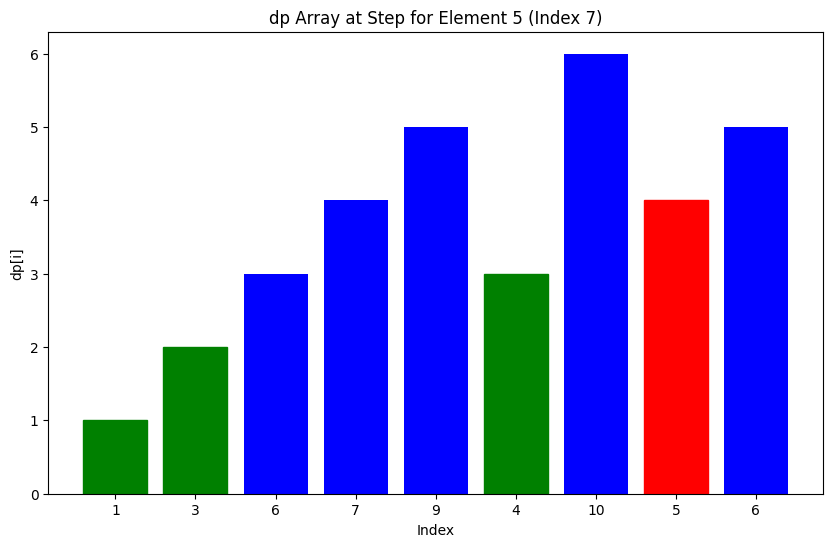

In [2]:
import matplotlib.pyplot as plt

# 序列和dp数组
A = [1, 3, 6, 7, 9, 4, 10, 5, 6]
dp = [1] * len(A)

# 计算dp数组的过程
for i in range(1, len(A)):
    for j in range(i):
        if A[j] < A[i] and dp[j] + 1 > dp[i]:
            dp[i] = dp[j] + 1

# 说明元素5的dp是怎么算的
# 元素5在序列中的索引是7
# 受到了元素1, 3, 4的影响
i = 7
influencing_indices = [0, 1, 5]

# 画柱形图
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(A)), dp, color='blue')

# 高亮影响元素5的柱子
for idx in influencing_indices:
    bars[idx].set_color('green')

# 高亮元素5的柱子
bars[i].set_color('red')

plt.xlabel('Index')
plt.ylabel('dp[i]')
plt.title(f'dp Array at Step for Element 5 (Index {i})')
plt.xticks(range(len(A)), A)
plt.show()

可以看到，dp数组在遇到元素5的时候，前面比它小的元素有1、3、4，因此`dp[7]`的计算过程如下：

- 对于元素1（索引0），`A[0] < A[7]`，所以`dp[7]`可以更新为`dp[0] + 1 = 2`。
- 对于元素3（索引1），`A[1] < A[7]`，所以`dp[7]`可以更新为`dp[1] + 1 = 3`。
- 对于元素4（索引5），`A[5] < A[7]`，所以`dp[7]`可以更新为`dp[5] + 1 = 4`。

最终，`dp[7]`的值为最大值4。

对于`ls[]`数组，直接进行拼接即可

## 优化思想

我们使用树状数组进行优化

> [参考链接](https://oi-wiki.org/ds/fenwick/)

### 树状数组

树状数组（Fenwick Tree）是一种可以高效进行前缀和查询和更新的数据结构。对于最长上升子序列问题，我们可以使用树状数组来优化动态规划的过程。

### 优化步骤

1. **离散化处理**：由于树状数组适用于处理离散值，我们需要对原序列进行离散化处理。将原序列中的每个元素映射到一个离散值范围内。

2. **树状数组初始化**：初始化一个树状数组，用于存储每个位置的最长上升子序列长度。

3. **动态规划结合树状数组**：
    - 对于每个元素`A[i]`，我们使用树状数组查询在`A[i]`之前的最长上升子序列长度。
    - 更新树状数组，将当前元素`A[i]`的最长上升子序列长度记录到树状数组中。


### 时间复杂度

树状数组的查询和更新操作的时间复杂度为`O(logn)`，因此整体时间复杂度为`O(nlogn)`。

### 代码实现

> 以下代码参考`GitHub Copilot`，请酌情给分(bushi)

> 参考OI-Wiki的树状数组知识页面和`GitHub Copilot`的提示，完成了如下代码

In [3]:
def discretize(arr: list) -> dict:
    """
    离散化处理函数。
    
    将原始数组中的元素映射到一个较小且连续的索引上，以减少树状数组的空间复杂度。
    返回的是一个字典，键是原始值，值是离散化后的索引。
    
    参数:
    arr (list): 需要离散化的原始数组
    
    返回:
    dict: 包含原始值和对应离散化索引的映射关系
    """
    sorted_arr = sorted(set(arr))  # 排序并去重
    return {val: idx + 1 for idx, val in enumerate(sorted_arr)}  # 构建值到索引的映射

def update(bit: list, idx: int, value: int):
    """
    更新树状数组中指定位置及其所有父节点的最大上升子序列长度。
    
    参数:
    bit (list): 树状数组
    idx (int): 要更新的位置（离散化后的索引）
    value (int): 新的上升子序列长度
    """
    while idx < len(bit):
        bit[idx] = max(bit[idx], value)  # 更新当前位置的最大值
        idx += idx & -idx  # 移动到下一个需要更新的位置（即当前节点的所有父节点）

def query(bit: list, idx: int) -> int:
    """
    查询树状数组中从起始位置到指定位置之间的最大上升子序列长度。
    
    参数:
    bit (list): 树状数组
    idx (int): 查询范围结束位置（离散化后的索引）
    
    返回:
    int: 指定范围内的最大上升子序列长度
    """
    max_val = 0
    while idx > 0:
        max_val = max(max_val, bit[idx])  # 获取当前位置的最大值
        idx -= idx & -idx  # 移动到前一个需要查询的位置（即当前节点的所有祖先节点）
    return max_val

def longest_increasing_subsequence(A: list) -> int:
    """
    计算最长上升子序列（LIS）的长度。
    
    使用离散化和树状数组来优化查找和更新操作，从而实现O(n log n)的时间复杂度。
    
    参数:
    A (list): 输入数组
    
    返回:
    int: 最长上升子序列的长度
    """
    if not A:
        return 0  # 如果输入数组为空，则LIS长度为0

    # 对输入数组进行离散化处理
    rank = discretize(A)
    # 初始化树状数组，长度为离散化后数组的大小加1（因为离散化索引从1开始）
    bit = [0] * (len(rank) + 1)

    # 遍历输入数组，计算每个元素对应的LIS长度，并更新树状数组
    for num in A:
        idx = rank[num]  # 获取当前元素的离散化索引
        # 查询比当前元素小的所有元素构成的LIS的最大长度，然后加1表示加上当前元素
        max_len = query(bit, idx - 1) + 1
        # 更新树状数组中对应位置的LIS长度
        update(bit, idx, max_len)

    # 返回树状数组中的最大值，即整个数组中最长上升子序列的长度
    return max(bit)

# 示例
A = [1, 3, 6, 7, 9, 4, 10, 5, 6, 7, 11]
length = longest_increasing_subsequence(A)
print(f"最长上升子序列的长度为: {length}")

最长上升子序列的长度为: 7


### low_bit函数说明

下面说明索引跳转关键函数`low_bit`

只需把`x`和`x`的补码做与运算，得到`x`的最后一个1所在的位置。

简单说明一下，如果x是`100100`，全部取反后得到`011011`，再加1得到`011100`，再与原来的`100100`做与运算，得到`000100`，即`4`。原来的x最后一个1的位置取反会得到0，经过加1后，最后一个1的位置不变，而其他位全部取反，再与原来的x做与运算，就得到了最后一个1的位置。



In [ ]:
def low_bit(x: int) -> int:
    """
    获取整数x的最低位1所代表的值。
    
    参数:
    x (int): 输入整数
    
    返回:
    int: x的最低位1所代表的值
    """
    return x & -x